## Libraries Used

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

## Import the Dataset

In [81]:
df = pd.read_csv('dataset/Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Exploratory Data Analysis

There are 13320 observations in the dataset with each having 9 columns. 8 of them are predictor variables and 1 being target variable [Price].

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


-------------------------------------------
Location, Size, Society, Bath and Balcony features have missing values. But number of missing values for location, size, bath and balcony are not much. Society has maximum missing values and we need to decide whether to drop the feature or imput it.

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [72]:
df.describe()

,size,bath,balcony,price
count,12710.000000,12710.000000,12710.000000,12710.000000
mean,2.737136,2.617309,1.584343,106.060778
std,1.205097,1.226000,0.817287,131.766089
min,1.000000,1.000000,0.000000,8.000000
25%,2.000000,2.000000,1.000000,49.030000
50%,3.000000,2.000000,2.000000,70.000000
75%,3.000000,3.000000,2.000000,115.000000
max,43.000000,40.000000,3.000000,2912.000000


In [77]:
df.describe(include=['O'])

,area_type,location,total_sqft
count,12710,12710,12710
unique,4,1265,1976
top,Super built-up Area,Whitefield,1200
freq,8481,514,788


-------
There are four different type of areas with 'Super built-up Area' having the maximum count. And there are no missing values. We can convert this feature into dummy variables.

In [13]:
# count of various area types
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

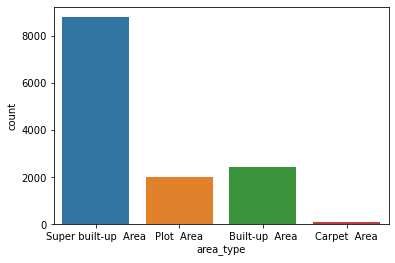

In [19]:
sns.countplot(x='area_type', data=df)

----
There are 81 different types of values for 'availability'. And for me this feature won't be useful in deciding the price of a house. So we will drop it in the data cleaning step

In [14]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Jun               1
14-Nov               1
14-Jul               1
15-Dec               1
16-Nov               1
Name: availability, Length: 81, dtype: int64

------
There are 4 different values for balconies a house has. 2 and 1 being the most common ones. There are many houses that do not have a balcony and there are 609 missing values. This number is comparatively less than the total number of observations, hence, we can drop those observations.

In [15]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

<AxesSubplot:xlabel='balcony', ylabel='count'>

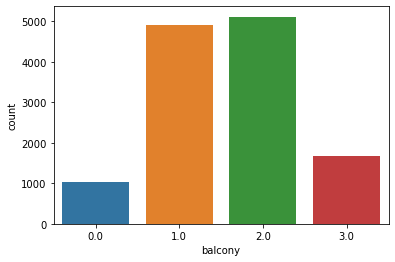

In [20]:
sns.countplot(x='balcony', data=df)

There are few different types of variables available.
- Continous: Price, Size, total_sqft
- Discrete: SibSp, Parch
- Categorical: Survived, Sex, and Embarked
- Ordinal: Pclass
- Mixed: Ticket
- Alphanumeric: Cabin

<AxesSubplot:xlabel='price', ylabel='Count'>

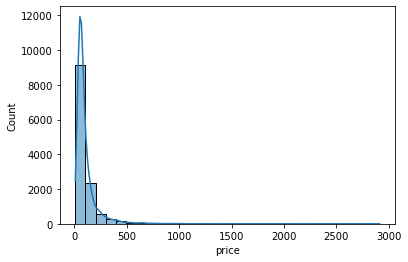

In [79]:
# distribution of price variable
sns.histplot(x='price', data=df, kde=True, bins=30)

In [84]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [83]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
GCngsn      1
DSvil S     1
Amivace     1
Invenai     1
AnentAp     1
Name: society, Length: 2688, dtype: int64

In [82]:
sum(df['society'].value_counts() == 1)

1524

In [44]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

<AxesSubplot:xlabel='bath', ylabel='count'>

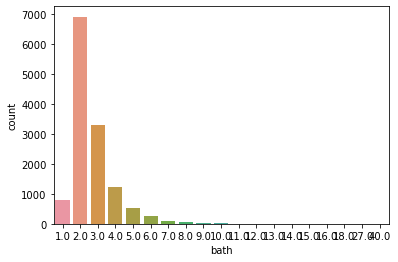

In [43]:
sns.countplot(x='bath', data=df)

In [50]:
df['total_sqft']

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
1180 - 1630      1
567              1
1445 - 1455      1
1669             1
1932.47          1
Name: total_sqft, Length: 2117, dtype: int64

## Data Cleaning

Decided to drop Availability, society

In [53]:
df.drop(['availability', 'society'], axis=1, inplace = True)

In [54]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [55]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [61]:
df.dropna(inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12710 non-null  object 
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(3), object(4)
memory usage: 794.4+ KB


In [63]:
df['size'] = df['size'].apply(lambda x: int(x.split(" ")[0]))

In [66]:
df['size'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [69]:
df[df['size'] > 10]

,area_type,location,size,total_sqft,bath,balcony,price
459,Super built-up Area,1 Giri Nagar,11,5000,9.0,3.0,360.0
1718,Super built-up Area,2Electronic City Phase II,27,8000,27.0,0.0,230.0
1768,Plot Area,1 Ramamurthy Nagar,11,1200,11.0,0.0,170.0
3853,Plot Area,1 Annasandrapalya,11,1200,6.0,3.0,150.0
4684,Plot Area,Munnekollal,43,2400,40.0,0.0,660.0
4916,Super built-up Area,1Channasandra,14,1250,15.0,0.0,125.0
6533,Plot Area,Mysore Road,12,2232,6.0,2.0,300.0
9935,Super built-up Area,1Hoysalanagar,13,5425,13.0,0.0,275.0


In [70]:
df['size'].value_counts()

2     5480
3     4655
4     1238
1      648
5      299
6      192
7       85
8       68
9       34
11       3
10       3
14       1
13       1
12       1
43       1
27       1
Name: size, dtype: int64